In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("corona.csv",low_memory=False)
df1 = df[(df["cough"] != "None") & (df["fever"] != "None") & (df["corona_result"] != "other")].reset_index(drop=True)
df1 = df1.astype({'cough':'int','fever':'int','sore_throat':'int','shortness_of_breath':'int','head_ache':'int'})

In [3]:
X = df1[["cough","fever","sore_throat","shortness_of_breath","head_ache",'age_60_and_above', 'gender', 'test_indication']]
Y = df1["corona_result"]

In [5]:
encoder = sklearn.preprocessing.OrdinalEncoder(categories=[[0,1],[0,1],[0,1],[0,1],[0,1],['No','Yes','None'],['female','male','None'],['Abroad','Contact with confirmed','Other']])
label_binarize = sklearn.preprocessing.LabelBinarizer()
X_enc = encoder.fit_transform(X)
Y_enc = label_binarize.fit_transform(Y)

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [179]:
clf1 = RandomForestClassifier(random_state=42)
clf2 = LogisticRegression(random_state=42)
clf3 = KNeighborsClassifier()
clf4 = GradientBoostingClassifier(random_state=42)
clf5 = MLPClassifier(max_iter=2000,random_state=42)


In [180]:
# Initiaze the hyperparameters for each dictionary
param1 = {}
param1['classifier__n_estimators'] = [2,8,32,128,256,512,1024]
param1['classifier__max_depth'] = [1,2,4,8,16]
param1['classifier__class_weight'] = [None, 'balanced']
param1['classifier__min_samples_leaf'] = [2,4,8,32,128,256]

param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['classifier__penalty'] = ['l1', 'l2']
param2['classifier__class_weight'] = [None, 'balanced']

param3 = {}
param3['classifier__n_neighbors'] = [3,5,9,15,33,65,127,257,513]
param3['classifier__weights'] = ['uniform', 'distance']
param3['classifier__p'] = [1,2]

param4 = {}
param4['classifier__n_estimators'] = [128]
param4['classifier__max_depth'] = [1,2,4]
# param4['classifier__class_weight'] = [None, 'balanced']
# param4['classifier__min_samples_leaf'] = [2,4,8,32,128,256]

param5 = {}
param5['classifier__hidden_layer_sizes'] = [(10),(10,10),(10,10,10)]


In [181]:
pipeline1 = Pipeline([('classifier', clf1)])
pipeline2 = Pipeline([('classifier', clf2)])
pipeline3 = Pipeline([('classifier', clf3)])
pipeline4 = Pipeline([('classifier', clf4)])
pipeline5 = Pipeline([('classifier', clf5)])

score = { "Accuracy":"balanced_accuracy" ,"roc_auc_score":"roc_auc","F1_Score":"f1"}

In [184]:
grid1 = GridSearchCV(pipeline1, n_jobs=-1, param_grid=[param1],scoring=score,refit="roc_auc_score")
grid2 = GridSearchCV(pipeline2, n_jobs=-1, param_grid=[param2],scoring=score,refit="roc_auc_score")
grid3 = GridSearchCV(pipeline3, n_jobs=-1, param_grid=[param3],scoring=score,refit="roc_auc_score")
grid4 = GridSearchCV(pipeline4, n_jobs=-1, param_grid=[param4],scoring=score,refit="roc_auc_score")
grid5 = GridSearchCV(pipeline5, n_jobs=-1, param_grid=[param5],scoring=score,refit="roc_auc_score")

In [125]:
grids = [grid1,grid2,grid3,grid4]

In [ ]:
for pipe in grids:
    print("Yes Done")
    pipe.fit(X_enc,Y_enc.reshape(-1))

In [185]:
grid5.fit(X_enc,Y_enc.reshape(-1))

GridSearchCV(estimator=Pipeline(steps=[('classifier',
                                        MLPClassifier(max_iter=2000,
                                                      random_state=42))]),
             n_jobs=-1,
             param_grid=[{'classifier__hidden_layer_sizes': [10, (10, 10),
                                                             (10, 10, 10)]}],
             refit='roc_auc_score',
             scoring={'Accuracy': 'balanced_accuracy', 'F1_Score': 'f1',
                      'roc_auc_score': 'roc_auc'})

In [186]:
grid5.best_estimator_

Pipeline(steps=[('classifier',
                 MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=2000,
                               random_state=42))])

In [130]:
grids[0]

In [ ]:
df = pd.DataFrame(grid4.cv_results_)

In [110]:
df = df.drop(columns=['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'params', 'split0_test_Accuracy', 'split1_test_Accuracy',
       'split2_test_Accuracy', 'split3_test_Accuracy', 'split4_test_Accuracy', 'std_test_Accuracy', 'rank_test_Accuracy',
       'split0_test_roc_auc_score', 'split1_test_roc_auc_score',
       'split2_test_roc_auc_score', 'split3_test_roc_auc_score',
       'split4_test_roc_auc_score','std_test_roc_auc_score', 'rank_test_roc_auc_score',
       'split0_test_F1_Score', 'split1_test_F1_Score', 'split2_test_F1_Score',
       'split3_test_F1_Score', 'split4_test_F1_Score', 'std_test_F1_Score', 'rank_test_F1_Score'])

Text(0.5, 1.0, 'F1 Score for different neighbours')

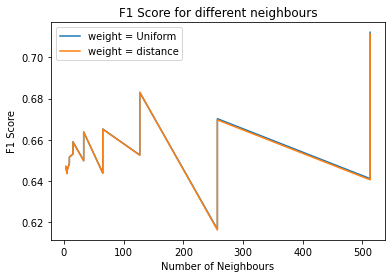

In [114]:
df1 = df[(df["param_classifier__p"] == 1)]
plt.plot(df1["param_classifier__n_neighbors"],df1["mean_test_Accuracy"],label = "weight = Uniform")
df1 = df[(df["param_classifier__p"] == 2)]
plt.plot(df1["param_classifier__n_neighbors"],df1["mean_test_Accuracy"],label = "weight = distance")
plt.legend()
# df1 = df[(~df["param_classifier__class_weight"].isna()) & (df["param_classifier__penalty"] == 'l2')]
# plt.plot(np.log10(df1["param_classifier__C"].tolist()),df1["mean_test_Accuracy"],label = "Class weight = Balanced")
# plt.legend(

plt.xlabel("Number of Neighbours")
plt.ylabel("F1 Score")
plt.title("F1 Score for different neighbours")

Text(0.5, 1.0, 'F1 Score for different depths of RF with varying min samples leaf')

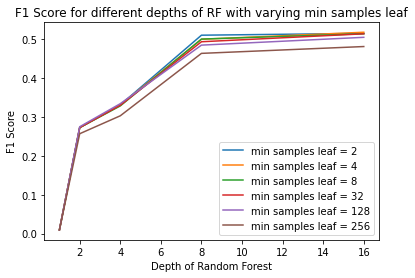

In [55]:
for i in [2,4,8,32,128,256]:
    df1 = df[(df["param_classifier__class_weight"].isna()) & (df["param_classifier__min_samples_leaf"] == i) & (df["param_classifier__n_estimators"] == 8) ]
    plt.plot(df1["param_classifier__max_depth"],df1["mean_test_F1_Score"],label = "min samples leaf = " + str(i) )
    plt.legend()
plt.xlabel("Depth of Random Forest")
plt.ylabel("F1 Score")
plt.title("F1 Score for different depths of RF with varying min samples leaf")

In [138]:
from sklearn.model_selection import StratifiedShuffleSplit

In [141]:
ss = StratifiedShuffleSplit(1, random_state=42)
train_index, test_index = list(ss.split(X_enc,Y_enc))[0]

In [144]:
X_train = X_enc[train_index]
X_test = X_enc[test_index]
Y_train = Y_enc[train_index]
Y_test =  Y_enc[test_index]

In [187]:
clf1 = RandomForestClassifier(n_estimators=128,max_depth=8, min_samples_leaf=2, class_weight=None,random_state=42)
clf2 = LogisticRegression(C= 1,class_weight="balanced",random_state=42)
clf3 = KNeighborsClassifier(n_neighbors=513,weights='distance')
clf4 = GradientBoostingClassifier(n_estimators=128,max_depth=2, min_samples_leaf=2, random_state=42)
clf5 = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=2000, random_state=42)


In [149]:
import time

In [188]:
start = time.time()
clf1.fit(X_train,Y_train)
y_prob1 = clf1.predict_proba(X_test)
end = time.time()
print(end-start)

start = time.time()
clf2.fit(X_train,Y_train)
y_prob2 = clf2.predict_proba(X_test)
end = time.time()
print(end-start)

start = time.time()
clf3.fit(X_train,Y_train)
y_prob3 = clf3.predict_proba(X_test)
end = time.time()
print(end-start)

start = time.time()
clf4.fit(X_train,Y_train)
y_prob4 = clf4.predict_proba(X_test)
end = time.time()
print(end-start)

start = time.time()
clf5.fit(X_train,Y_train)
y_prob5 = clf5.predict_proba(X_test)
end = time.time()
print(end-start)

C:\Users\RONAKD~1\AppData\Local\Temp/ipykernel_10972/598165249.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf1.fit(X_train,Y_train)


8.456745386123657


C:\Users\ronakdediya\anaconda33\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6372284889221191


C:\Users\ronakdediya\anaconda33\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


41.97617149353027


C:\Users\ronakdediya\anaconda33\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


12.975123882293701


C:\Users\ronakdediya\anaconda33\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


20.956078052520752


Text(0.5, 1.0, 'Training time of algorithms')

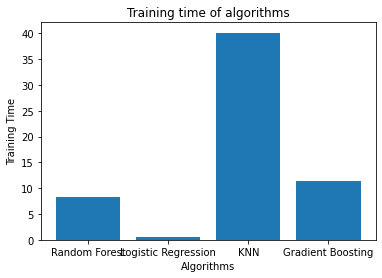

In [153]:
plt.bar(['Random Forest','Logistic Regression','KNN','Gradient Boosting'],[8.3,0.629,40.11,11.33])
plt.xlabel("Algorithms")
plt.ylabel("Training Time")
plt.title("Training time of algorithms")

Text(0.5, 1.0, 'Training time of algorithms')

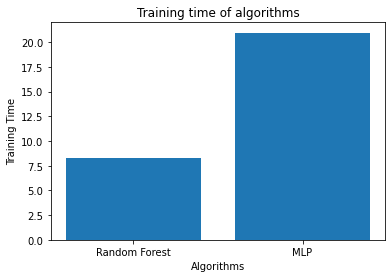

In [189]:
plt.bar(['Random Forest','MLP'],[8.3,20.95])
plt.xlabel("Algorithms")
plt.ylabel("Training Time")
plt.title("Training time of algorithms")

Text(0.5, 1.0, 'F1 Score of algorithms')

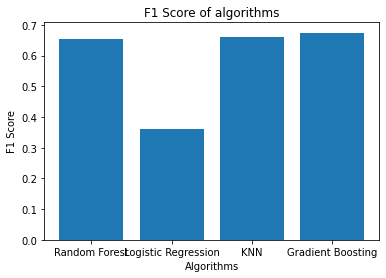

In [176]:
plt.bar(['Random Forest','Logistic Regression','KNN','Gradient Boosting'],[f1_score(Y_test,np.argmax(y_prob1,axis =1 )),
                                                                           f1_score(Y_test,np.argmax(y_prob2,axis =1 )),
                                                                           f1_score(Y_test,np.argmax(y_prob3,axis =1 )),
                                                                           f1_score(Y_test,np.argmax(y_prob4,axis =1 ))
                                                                           ])
plt.xlabel("Algorithms")
plt.ylabel("F1 Score")
plt.title("F1 Score of algorithms")

Text(0.5, 1.0, 'F1 Score of algorithms')

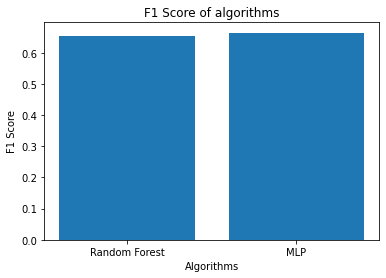

In [190]:
plt.bar(['Random Forest','MLP'],[f1_score(Y_test,np.argmax(y_prob1,axis =1 )),
                                                                           f1_score(Y_test,np.argmax(y_prob5,axis =1 ))
                                                                           ])
plt.xlabel("Algorithms")
plt.ylabel("F1 Score")
plt.title("F1 Score of algorithms")

Text(0.5, 1.0, 'ROC AUC Curve')

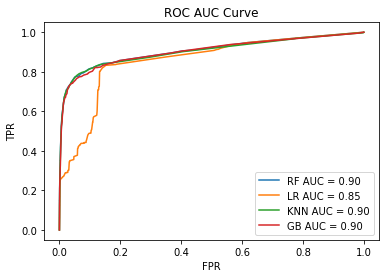

In [167]:
fpr,tpr,thresh = roc_curve(Y_test,y_prob1[:,1])
plt.plot(fpr,tpr,label="RF AUC = " + str(auc(fpr,tpr))[:4])

fpr,tpr,thresh = roc_curve(Y_test,y_prob2[:,1])
plt.plot(fpr,tpr,label="LR AUC = " + str(auc(fpr,tpr))[:4])

fpr,tpr,thresh = roc_curve(Y_test,y_prob3[:,1])
plt.plot(fpr,tpr,label="KNN AUC = " + str(auc(fpr,tpr))[:4])

fpr,tpr,thresh = roc_curve(Y_test,y_prob4[:,1])
plt.plot(fpr,tpr,label="GB AUC = " + str(auc(fpr,tpr))[:4])
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC AUC Curve")

Text(0.5, 1.0, 'ROC AUC Curve')

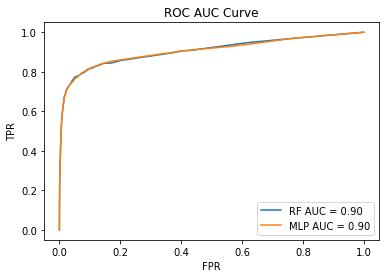

In [191]:
fpr,tpr,thresh = roc_curve(Y_test,y_prob1[:,1])
plt.plot(fpr,tpr,label="RF AUC = " + str(auc(fpr,tpr))[:4])

fpr,tpr,thresh = roc_curve(Y_test,y_prob5[:,1])
plt.plot(fpr,tpr,label="MLP AUC = " + str(auc(fpr,tpr))[:4])

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC AUC Curve")

Text(0.5, 1.0, 'Precision Recall Curve')

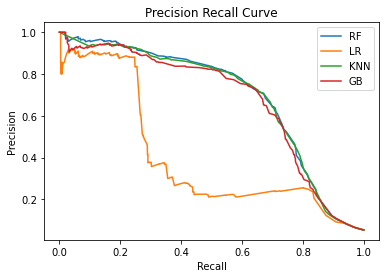

In [170]:
fpr,tpr,thresh = precision_recall_curve(Y_test,y_prob1[:,1])
plt.plot(tpr,fpr,label="RF")

fpr,tpr,thresh = precision_recall_curve(Y_test,y_prob2[:,1])
plt.plot(tpr,fpr,label="LR")

fpr,tpr,thresh = precision_recall_curve(Y_test,y_prob3[:,1])
plt.plot(tpr,fpr,label="KNN")

fpr,tpr,thresh = precision_recall_curve(Y_test,y_prob4[:,1])
plt.plot(tpr,fpr,label="GB")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve")

Text(0.5, 1.0, 'Precision Recall Curve')

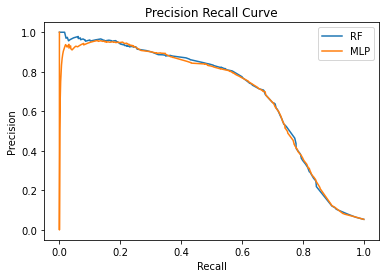

In [193]:
fpr,tpr,thresh = precision_recall_curve(Y_test,y_prob1[:,1])
plt.plot(tpr,fpr,label="RF")

fpr,tpr,thresh = precision_recall_curve(Y_test,y_prob5[:,1])
plt.plot(tpr,fpr,label="MLP")

plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve")

In [3]:
import tensorflow as tf
x = tf.constant([[2,3,4],[4,5,6]])
val = tf.reduce_sum(x,0,keepdims=True)

In [7]:
# Time left 0:18:44
# Question 1
# Not yet answered
# Marked out of 1.00
# Not flaggedFlag question
# Question text
class Dog:
     def walk(self):
         return "walking"

     def speak(self):
         return "Woof!"

class JackRussellTerrier(Dog):
     def talk(self):
         return super().speak()

bobo = JackRussellTerrier()
bobo.talk()

'Woof!'

In [2]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=7dd58f3f9d39a4a1601c939df5eeb150902975ae6c9cd2492ec406d9763ca44e
  Stored in directory: c:\users\ronakdediya\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor
